In [1]:
d=open('data.train','r')

In [2]:
d.read()

'25,0.08,8777,77,2,28.29,c\n28,0.07,3182,34,4,26.76,a\n19,0.03,7624,34,0,33.6,b\n40,0.05,5443,89,4,31.61,b\n16,0.02,1215,89,0,22.34,a\n38,0.03,8507,34,0,15.2,c\n15,0.04,8775,78,7,29.12,b\n39,0.01,5658,31,1,14.07,b\n30,0.03,4755,12,4,22.03,b\n32,0.08,3866,61,7,28.43,b\n48,0.09,3807,67,1,21.77,c\n49,0.05,1808,77,1,33.34,c\n42,0.06,1519,12,1,15.79,c\n16,0.02,2914,61,3,25.83,c\n21,0.08,1373,42,3,28.05,c\n26,0.04,4727,34,4,16.46,a\n38,0.04,6646,34,7,26.33,a\n33,0.06,4562,31,2,15.96,c\n46,0.04,3460,34,2,12.4,a\n45,0.06,3870,89,4,32.8,b\n22,0.01,1120,34,3,24.47,b\n25,0.07,3678,34,3,28.66,c\n15,0.08,8184,78,4,24.47,b\n40,0.09,3539,61,2,19.49,b\n35,0.08,5712,77,1,21.02,c\n46,0.06,6626,78,0,14.16,c\n42,0.03,2467,13,0,17.65,a\n20,0.06,1706,34,7,23.14,c\n26,0.07,7503,34,1,17.11,a\n20,0.06,1457,89,0,17.66,a\n22,0.07,8000,67,2,23.26,b\n26,0.07,4498,77,4,30.17,c\n45,0.05,7855,42,0,21.39,c\n44,0.09,8246,12,0,21.08,c\n31,0.02,6581,34,4,33.37,c\n12,0.06,6587,56,1,16.01,a\n19,0.09,7797,42,2,32.55,a\n43,0

In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('data.train', header=None)

In [5]:
df.head(5)

,0,1,2,3,4,5,6
0,25,0.08,8777,77,2,28.29,c
1,28,0.07,3182,34,4,26.76,a
2,19,0.03,7624,34,0,33.60,b
3,40,0.05,5443,89,4,31.61,b
4,16,0.02,1215,89,0,22.34,a


In [6]:
headers=['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio' , 'class']
df.columns=headers # replace default header by given data

In [7]:
df.head(5)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class
0,25,0.08,8777,77,2,28.29,c
1,28,0.07,3182,34,4,26.76,a
2,19,0.03,7624,34,0,33.60,b
3,40,0.05,5443,89,4,31.61,b
4,16,0.02,1215,89,0,22.34,a


In [8]:
df.describe()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,29.776667,0.052900,4961.773333,49.540000,2.863333,23.489700
std,11.863780,0.023899,2301.284968,23.669161,2.296862,6.163415
min,10.000000,0.010000,1035.000000,12.000000,0.000000,12.250000
25%,20.000000,0.030000,2952.000000,34.000000,1.000000,18.975000
50%,30.000000,0.050000,4958.500000,42.000000,3.000000,23.225000
75%,40.000000,0.070000,6861.250000,77.000000,4.000000,28.385000
max,50.000000,0.090000,8966.000000,89.000000,7.000000,34.540000


In [9]:
#Checking Missing Values
df.apply(lambda x: sum(x.isnull()),axis=0) 

age                 0
rok_index           0
rok_summation       0
promo_value         0
event_value         0
conversion_ratio    0
class               0
dtype: int64

In [10]:
df.dtypes

age                   int64
rok_index           float64
rok_summation         int64
promo_value           int64
event_value           int64
conversion_ratio    float64
class                object
dtype: object

In [11]:
#Count : Number of classes
df['class'].value_counts()

b    106
c     97
a     97
Name: class, dtype: int64

In [12]:
#Here, we convert our class into label from string to integer value
label = df['class'].replace({
    'a':1,
    'b':2,
    'c':3
})
df['label'] = label

In [13]:
#Show our dataframe with a new coulumn 
df.head()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class,label
0,25,0.08,8777,77,2,28.29,c,3
1,28,0.07,3182,34,4,26.76,a,1
2,19,0.03,7624,34,0,33.60,b,2
3,40,0.05,5443,89,4,31.61,b,2
4,16,0.02,1215,89,0,22.34,a,1


# 2. Exploratory Data Analysis from scratch

In [14]:
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

In [15]:
eda(df)

Preview of data:


,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class,label
0,25,0.08,8777,77,2,28.29,c,3
1,28,0.07,3182,34,4,26.76,a,1
2,19,0.03,7624,34,0,33.60,b,2



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
age                 300 non-null int64
rok_index           300 non-null float64
rok_summation       300 non-null int64
promo_value         300 non-null int64
event_value         300 non-null int64
conversion_ratio    300 non-null float64
class               300 non-null object
label               300 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 18.8+ KB
None


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
                  
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

In [17]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

class    3
dtype: int64
Top 5 unique values of class
  class  Count
0     b    106
1     c     97
2     a     97
 



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
age,300.0,29.776667,11.863780,10.00,20.000,30.000,40.000,50.00
rok_index,300.0,0.052900,0.023899,0.01,0.030,0.050,0.070,0.09
rok_summation,300.0,4961.773333,2301.284968,1035.00,2952.000,4958.500,6861.250,8966.00
promo_value,300.0,49.540000,23.669161,12.00,34.000,42.000,77.000,89.00
event_value,300.0,2.863333,2.296862,0.00,1.000,3.000,4.000,7.00
conversion_ratio,300.0,23.489700,6.163415,12.25,18.975,23.225,28.385,34.54
label,300.0,2.000000,0.805499,1.00,1.000,2.000,3.000,3.00


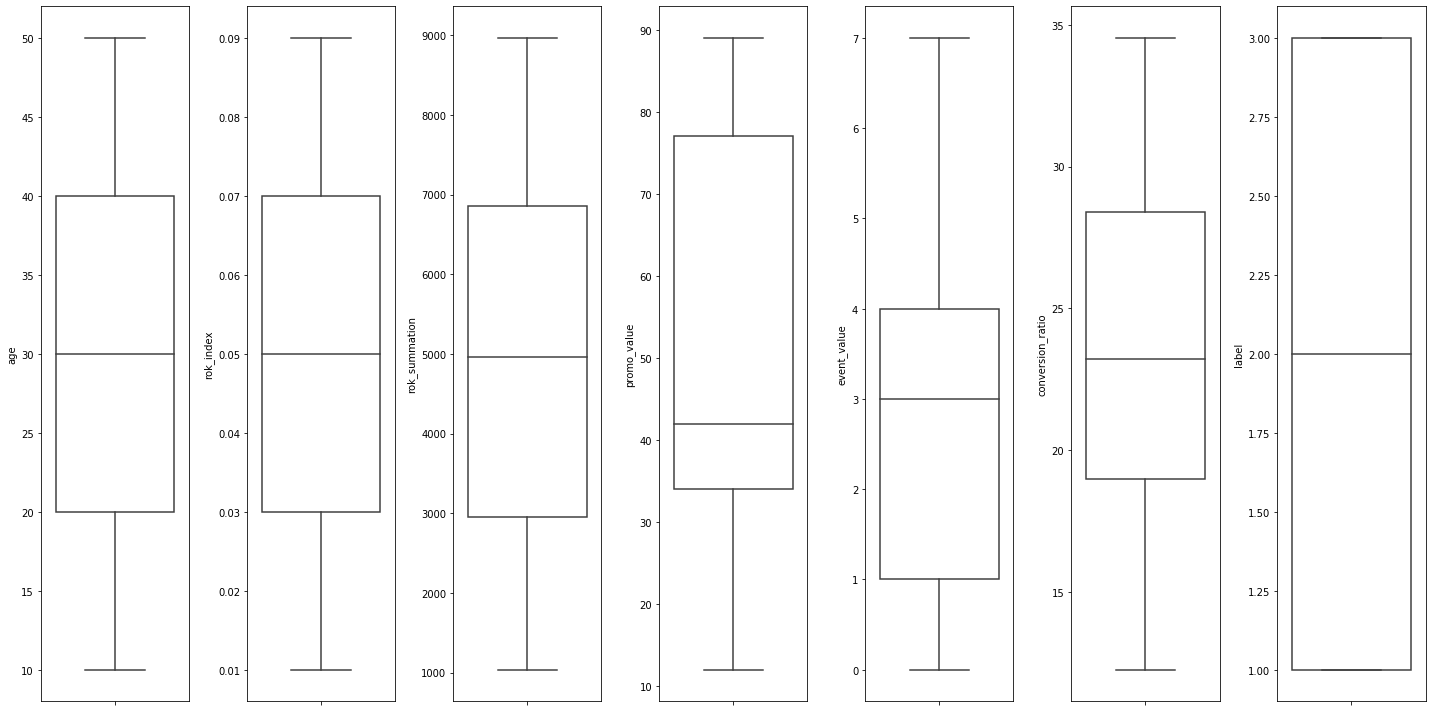


To check pairwise joint distribution of numeric data


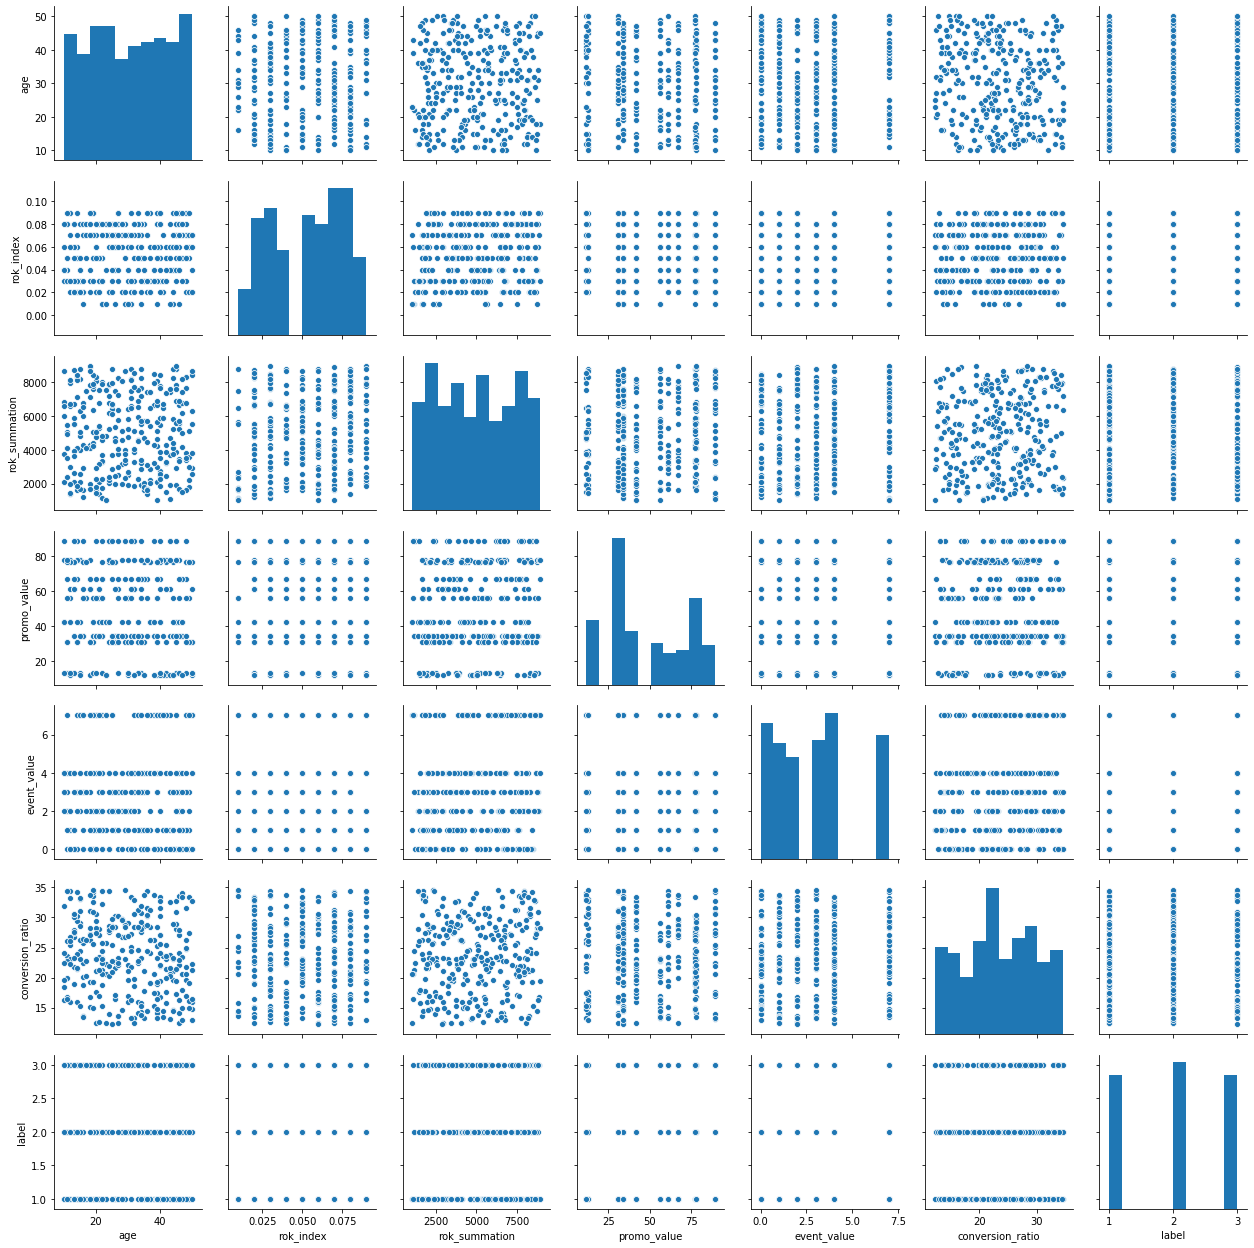

In [18]:
numeric_eda(df)

# Heatmap from scratch

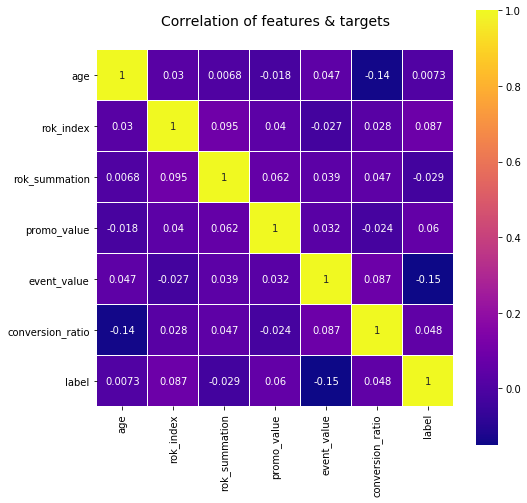

In [19]:
#Heatmap from scratch
cols = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio','label']
data = df[cols]
colormap = plt.cm.plasma
plt.figure(figsize=(8,8))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

# univariate distribution from scratch

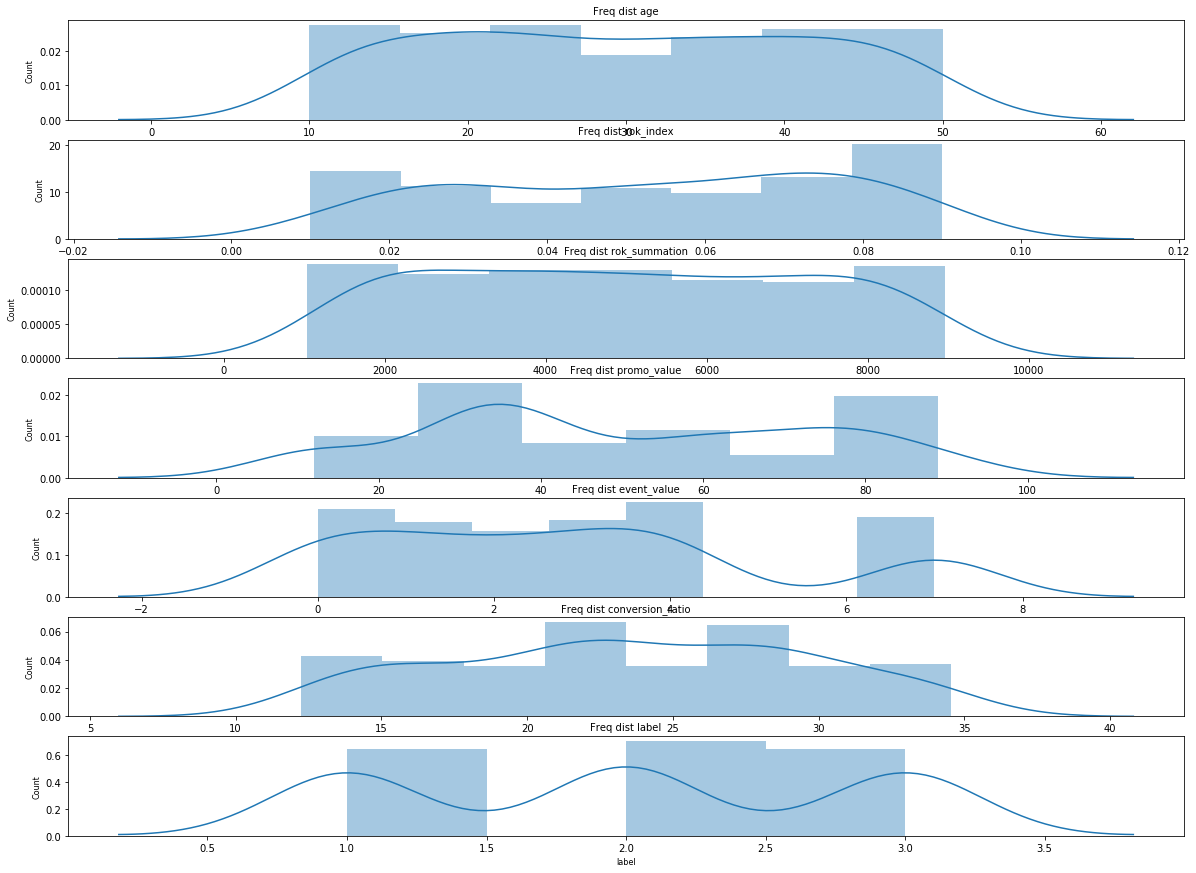

In [20]:
#univariate distribution of the numerical columns which contains the histograms
col_names = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio','label']

fig, ax = plt.subplots(len(col_names), figsize=(20,15))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# 2.1 Central tendencies of data

In [21]:
#Mean
np.mean(df)

age                   29.776667
rok_index              0.052900
rok_summation       4961.773333
promo_value           49.540000
event_value            2.863333
conversion_ratio      23.489700
label                  2.000000
dtype: float64

In [22]:
#median
k=df.drop(['class'],axis=1)
np.median(k)

16.785

In [23]:
#mode
import collections
k=df.rename(columns=df.iloc[0]).drop(df.index[0])
data = collections.Counter(k) # drop header
get_mode = dict(data) 
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))] 
  
if len(mode) == 0: 
    get_mode = "No mode found"
else: 
    get_mode = "Mode is / are: " + ', '.join(map(str, mode)) 
      
print(get_mode) 

Mode is / are: 25, 0.08, 8777, 77, 2, 28.29, c, 3


# 2.2 Fluctuation rates in data field

In [24]:
# Standard deviation of list 
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print('Age:                ',stdev(df['age']))
print('rok_index:          ',stdev(df['rok_index']))
print('rok_summation:      ',stdev(df['rok_summation']))
print('promo_value:        ',stdev(df['promo_value']))
print('event_value:        ',stdev(df['event_value']))
print('conversion_ratio:   ',stdev(df['conversion_ratio']))
print('label:              ',stdev(df['label']))

Age:                 11.863780447673111
rok_index:           0.02389896514740872
rok_summation:       2301.2849679329893
promo_value:         23.669160607837334
event_value:         2.296861801678308
conversion_ratio:    6.163415222153128
label:               0.8054994918919112


In [25]:
#Varience
df.var()

age                 1.407493e+02
rok_index           5.711605e-04
rok_summation       5.295913e+06
promo_value         5.602292e+02
event_value         5.275574e+00
conversion_ratio    3.798769e+01
label               6.488294e-01
dtype: float64

# 2.3 Correlation

In [26]:
#Correlation
df.corr()

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,label
age,1.000000,0.029540,0.006835,-0.017506,0.047357,-0.140293,0.007350
rok_index,0.029540,1.000000,0.094887,0.040265,-0.027484,0.028274,0.086867
rok_summation,0.006835,0.094887,1.000000,0.062431,0.038945,0.046601,-0.029007
promo_value,-0.017506,0.040265,0.062431,1.000000,0.031630,-0.023649,0.060169
event_value,0.047357,-0.027484,0.038945,0.031630,1.000000,0.086670,-0.150040
conversion_ratio,-0.140293,0.028274,0.046601,-0.023649,0.086670,1.000000,0.047668
label,0.007350,0.086867,-0.029007,0.060169,-0.150040,0.047668,1.000000


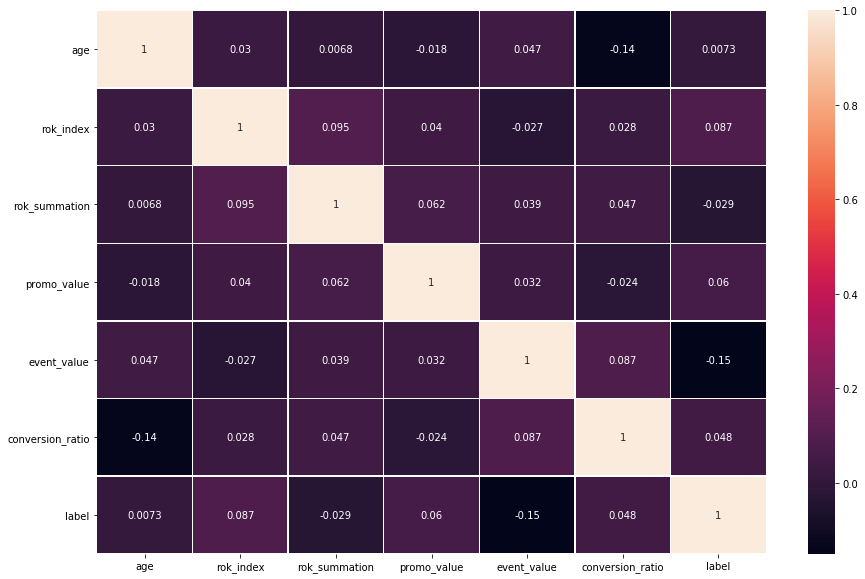

In [27]:
#Heat Map of Correlataion
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,linewidths = 0.5)

# 2.4 Coefficient of Variation

In [28]:
Standard_deviation=np.std(df)
mean=np.mean(df)
cv= Standard_deviation / mean
print('Coefficient of Variation:\n',cv)

Coefficient of Variation:
 age                 0.397761
rok_index           0.451023
rok_summation       0.463029
promo_value         0.476982
event_value         0.800826
conversion_ratio    0.261950
label               0.402078
dtype: float64


# 2.5 Plotting for data visualization

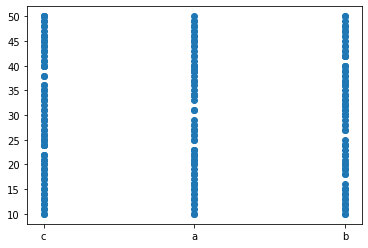

In [29]:
r=df['age']
w=df['class']
plt.scatter(w,r)

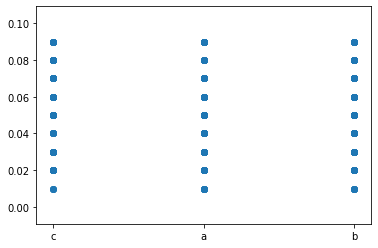

In [30]:
r=df['rok_index']
w=df['class']
plt.scatter(w,r)


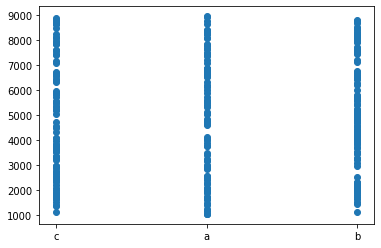

In [31]:
r=df['rok_summation']
w=df['class']
plt.scatter(w,r)

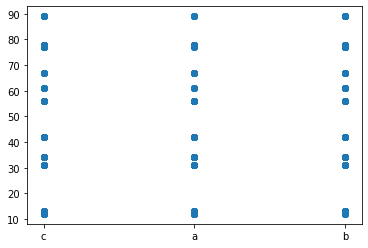

In [32]:
import matplotlib.pyplot as plt
r=df['promo_value']
w=df['class']
plt.scatter(w,r)

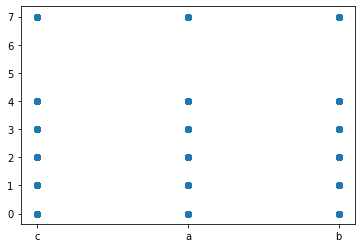

In [33]:
import matplotlib.pyplot as plt
r=df['event_value']
w=df['class']
plt.scatter(w,r)

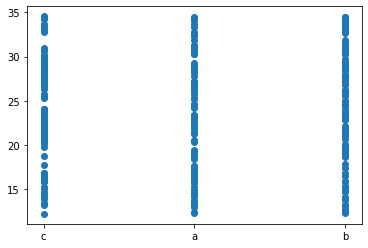

In [34]:
import matplotlib.pyplot as plt
r=df['conversion_ratio']
w=df['class']
plt.scatter(w,r)

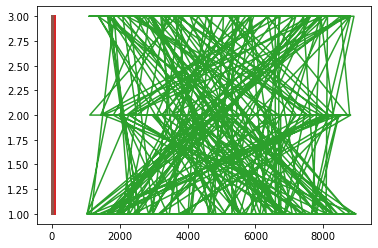

In [35]:
#Scattering correlation plot for pattern recognization 
m=df.drop(['class','label'],axis=1) # plt.scatter
n=df['label']
plt.plot(m,n)

# 3. Classifier Algorithm from scratch

In [36]:
df1=df.copy()

In [37]:
X=df1.drop(['class', 'label'],axis=1)
y=df1['label']

# 3.1. Random Forest

In [80]:
# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    predicteds = [] #for prediction on test data
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
        predicteds.append(predicted)
    return scores , predicteds

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Select the best split point for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root

# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)


In [81]:
# Test the random forest algorithm
seed(2)
# load and prepare data
filename = 'data.train'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(0, len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
# predictions = []
for n_trees in [1, 5, 10]:
    scores,predicteds = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    # scores, predicteds = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    # predictions.append(predicteds)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Scores: [35.0, 31.666666666666664, 31.666666666666664, 35.0, 31.666666666666664]
Mean Accuracy: 33.000%
Trees: 5
Scores: [30.0, 36.666666666666664, 36.666666666666664, 38.333333333333336, 31.666666666666664]
Mean Accuracy: 34.667%
Trees: 10
Scores: [26.666666666666668, 33.33333333333333, 48.333333333333336, 26.666666666666668, 30.0]
Mean Accuracy: 33.000%


# Prediction on Test Data

In [83]:
dataset=open('data.test','r')
Dataset_dataframe = pd.DataFrame(dataset) 
headers=['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio' , 'class']
Dataset_dataframe.columns=headers
label = Dataset_dataframe['class'].replace({
    0 : 'a',
    1 : 'b',
    2 : 'c'
})
Dataset_dataframe['prediction'] = label
Dataset_dataframe.head(10)

,age,rok_index,rok_summation,promo_value,event_value,conversion_ratio,class,prediction
0,25.0,0.08,8777.0,77.0,2.0,28.29,1,b
1,28.0,0.07,3182.0,34.0,4.0,26.76,2,c
2,19.0,0.03,7624.0,34.0,0.0,33.60,0,a
3,40.0,0.05,5443.0,89.0,4.0,31.61,0,a
4,16.0,0.02,1215.0,89.0,0.0,22.34,2,c
5,38.0,0.03,8507.0,34.0,0.0,15.20,1,b
6,15.0,0.04,8775.0,78.0,7.0,29.12,0,a
7,39.0,0.01,5658.0,31.0,1.0,14.07,0,a
8,30.0,0.03,4755.0,12.0,4.0,22.03,0,a
9,32.0,0.08,3866.0,61.0,7.0,28.43,0,a


# Multilayer Perceptrons (MLP)

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

%matplotlib inline

In [89]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

#Convert one-hot encoding to array
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [90]:
#read data from csv
data = pd.read_csv("data.train", header = None)

headers=['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio' , 'class']
data.columns=headers # replace default header by given data
data.head()

#Data cleanup
#Replace the species with 1,2 or 3 as appropriate
data['class'].replace(['a', 'b', 'c'], [0, 1, 2], inplace=True)

#Get input
columns = ['age' , 'rok_index' , 'rok_summation' , 'promo_value' , 'event_value' ,
'conversion_ratio' ]
x = pd.DataFrame(data, columns=columns)
x = normalize(x.as_matrix())

#Get Output, flatten and encode to one-hot
columns = ['class']
y = pd.DataFrame(data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

# Split data to training and test data from scratch

In [93]:
train_pct_index = int(0.9 * len(x))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


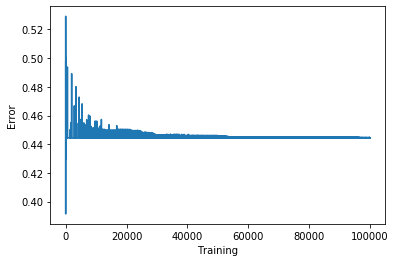

Training Accuracy 55.56%


In [98]:
#Weights
w0 = 2*np.random.random((6, 5)) - 1 
w1 = 2*np.random.random((5, 3)) - 1 

#learning rate
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(100000):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

In [99]:
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Test Accuracy " + str(round(accuracy,2)) + "%")

Test Accuracy 55.52%


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


# 2. KNN

In [84]:
import numpy as np
def split_train_valid_test(data,valid_ratio,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    valid_set_size= int(len(data)*valid_ratio)
    valid_indcies=shuffled_indcies[:valid_set_size]
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[valid_set_size:test_set_size+valid_set_size]
    train_indices=shuffled_indcies[test_set_size:]
    return data.iloc[train_indices],data.iloc[valid_indcies],data.iloc[test_indcies]

train_set,valid_set,test_set=split_train_valid_test(m,valid_ratio=0.2,test_ratio=0.2)
print(len(train_set),len(valid_set),len(test_set))

240 60 60


In [85]:
import unicodecsv
import random
import operator
import math


#random train test data split function definition
def shuffle(i_data):
    random.shuffle(i_data)
    train_data = i_data[:int(0.7*30)]
    test_data = i_data[int(0.7*30):]
    return train_data, test_data

def euclideanDist(x, xi):
    d = 0.0
    for i in range(len(x)-1):
        d += pow((float(x[i])-float(xi[i])),2)  #euclidean distance
    d = math.sqrt(d)
    return d

#KNN prediction and model training
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        eu_Distance =[]
        knn = []
        good = 0

        bad = 0
        for j in train_data:
            eu_dist = euclideanDist(i, j)
            eu_Distance.append((j[5], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
            for k in knn:
                if k[0] =='g':
                    good += 1
                else:
                    bad +=1
        if good > bad:
            i.append('g')
        elif good < bad:
            i.append('b')
        else:
            i.append('NaN')

#Accuracy calculation function
def accuracy(test_data):
    correct = 0
    for i in test_data:
        if i[5] == i[6]:
            correct += 1
    accuracy = float(correct)/len(test_data) *100  #accuracy 
    return accuracy



In [86]:
# calculate the Euclidean distance between two vectors
from math import sqrt
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [87]:
dataset = df
for row in dataset:
    distance = euclidean_distance(dataset['age'], dataset['label'])
    distance1 = euclidean_distance(df['rok_index'], df['label'])
    distance2 = euclidean_distance(df['rok_summation'], df['label'])
    distance3 = euclidean_distance(df['promo_value'], df['label'])
    distance4 = euclidean_distance(df['event_value'], df['label'])
    distance5 = euclidean_distance(df['conversion_ratio'], df['label'])
    distance6 = euclidean_distance(df['label'], df['label'])
    
print("Euclidean distance between age and label: ",distance)
print("Euclidean distance between rok_index and label: ",distance1)
print("Euclidean distance between rok_summation and label: ",distance2)
print("Euclidean distance between promo_value and label: ",distance3)
print("Euclidean distance between event_value and label: ",distance4)
print("Euclidean distance between conversion_ratio and label: ",distance5)
print("Euclidean distance between label and label: ",distance6)

Euclidean distance between age and label:  522.4653098531998
Euclidean distance between rok_index and label:  36.464831001939416
Euclidean distance between rok_summation and label:  94653.68265947184
Euclidean distance between promo_value and label:  918.6637034301508
Euclidean distance between event_value and label:  46.389654018972806
Euclidean distance between conversion_ratio and label:  386.9973006365807
Euclidean distance between label and label:  0.0
